## Import libraries

In [42]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb  # Assuming xgboost is already installed
from sklearn.naive_bayes import *
from lightgbm import LGBMClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import *
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [4]:
df=pd.read_csv('Base.csv')

In [5]:
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,6732.602414,3010.048099,3095.754245,42,8,CA,305,1,BB,1,1,31,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,1574.293294,2716.495767,4286.089050,0,5,CA,235,0,BA,1,1,-1,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,1258.864938,3601.322892,3103.891664,2,3,CA,195,1,BE,0,1,31,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,7048.137128,6521.395012,3068.265084,7,8,CA,148,0,BD,0,1,1,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [6]:
df.fraud_bool.value_counts(normalize=False)

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['fraud_bool'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['fraud_bool'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 98.9 % of the dataset
Frauds 1.1 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

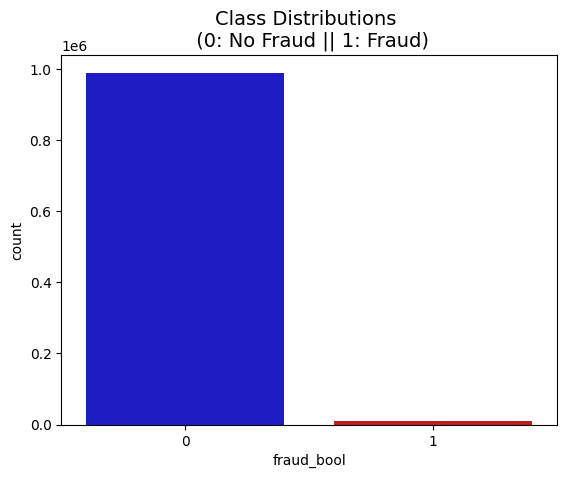

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df,x='fraud_bool',  palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

In [9]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [10]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


<Axes: xlabel='prev_address_months_count', ylabel='Density'>

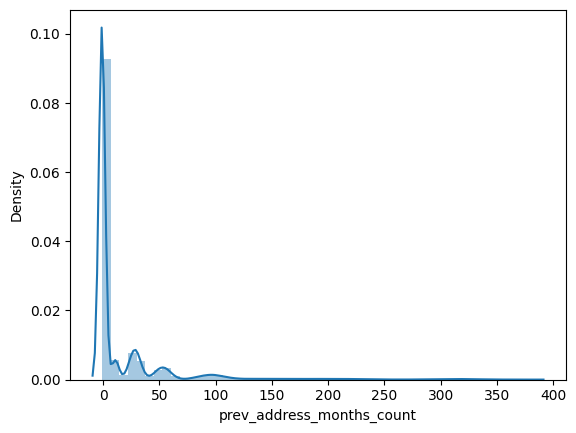

In [11]:
sns.distplot(df['prev_address_months_count'])

<Axes: xlabel='current_address_months_count', ylabel='Density'>

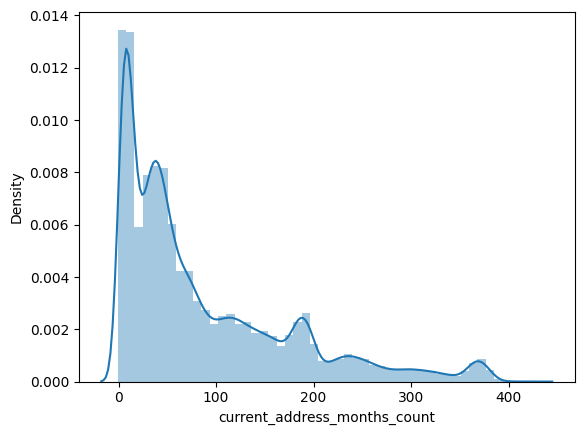

In [12]:
sns.distplot(df['current_address_months_count'])

<Axes: xlabel='customer_age', ylabel='Density'>

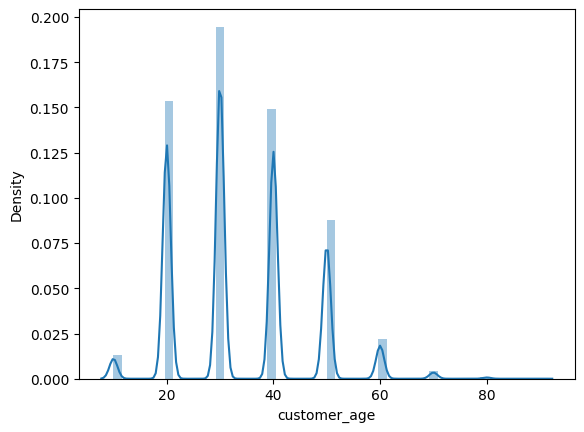

In [13]:
sns.distplot(df['customer_age'])

In [14]:
df.customer_age.value_counts()

customer_age
30    311433
20    245855
40    238712
50    140353
60     34770
10     20987
70      6517
80      1297
90        76
Name: count, dtype: int64

<Axes: xlabel='days_since_request', ylabel='Density'>

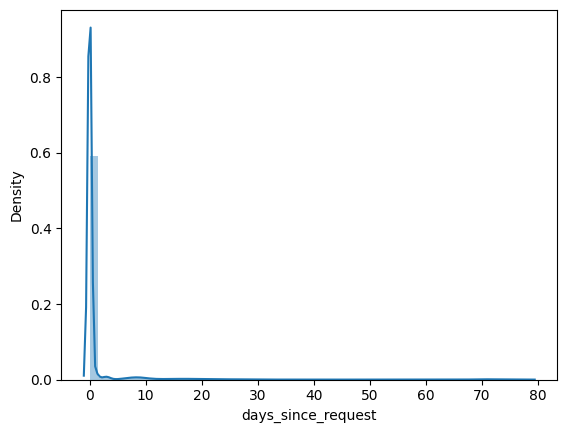

In [15]:
sns.distplot(df['days_since_request'])

In [9]:
df.drop('device_fraud_count',axis=1,inplace=True)

In [10]:
num_df=df.select_dtypes(exclude='object')

In [18]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,7.000000


In [19]:
# df.device_fraud_count.value_counts()

In [20]:
df.device_distinct_emails_8w.value_counts()

device_distinct_emails_8w
 1    968067
 2     25302
 0      6272
-1       359
Name: count, dtype: int64

In [21]:
df.phone_home_valid.value_counts()

phone_home_valid
0    582923
1    417077
Name: count, dtype: int64

In [22]:
df.email_is_free.value_counts()

email_is_free
1    529886
0    470114
Name: count, dtype: int64

In [23]:
df.days_since_request.max()

78.45690383509861

In [11]:
list_drop_no_scale=['fraud_bool','income','name_email_similarity','email_is_free','phone_home_valid','phone_mobile_valid','has_other_cards','foreign_request','keep_alive_session','month']

In [12]:
num_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9,0,1500.0,0,16.224843,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2,0,1500.0,0,3.363854,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30,0,200.0,0,22.730559,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1,0,200.0,0,15.215816,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26,0,200.0,0,3.743048,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,530,6732.602414,3010.048099,3095.754245,42,8,305,1,1,1,31,0,1500.0,0,16.967770,0,1,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,408,1574.293294,2716.495767,4286.089050,0,5,235,0,1,1,-1,1,1000.0,0,1.504109,0,1,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,749,1258.864938,3601.322892,3103.891664,2,3,195,1,0,1,31,0,200.0,0,16.068595,0,1,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,707,7048.137128,6521.395012,3068.265084,7,8,148,0,0,1,1,0,200.0,0,1.378683,1,1,7


In [13]:
num_df.drop(list_drop_no_scale,axis=1,inplace=True)

In [14]:
num_df

,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w
0,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,9,1500.0,16.224843,1
1,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,2,1500.0,3.363854,1
2,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,30,200.0,22.730559,1
3,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,200.0,15.215816,1
4,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,26,200.0,3.743048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-1,143,30,0.051348,-0.826239,530,6732.602414,3010.048099,3095.754245,42,8,305,31,1500.0,16.967770,1
999996,-1,193,30,0.009591,0.008307,408,1574.293294,2716.495767,4286.089050,0,5,235,-1,1000.0,1.504109,1
999997,-1,202,10,0.059287,50.609995,749,1258.864938,3601.322892,3103.891664,2,3,195,31,200.0,16.068595,1
999998,52,3,30,0.023357,-1.313387,707,7048.137128,6521.395012,3068.265084,7,8,148,1,200.0,1.378683,1


In [15]:
num_df.describe()

,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,10.839303,515.851010,7.544940,1.018312
std,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,12.116875,487.559902,8.033106,0.180761
min,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,-1.000000,190.000000,-1.000000,-1.000000
25%,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,-1.000000,200.000000,3.103053,1.000000
50%,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,5.000000,200.000000,5.114321,1.000000
75%,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,25.000000,500.000000,8.866131,1.000000
max,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,32.000000,2100.000000,85.899143,2.000000


In [16]:
num_df_scale=num_df.copy()

In [17]:
rob_scaler=RobustScaler()

In [18]:
num_col_scale=list(num_df_scale.columns)

In [19]:
num_col_scale

['prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'device_distinct_emails_8w']

In [20]:
num_df_scale[num_col_scale] = rob_scaler.fit_transform(num_df[num_col_scale])

In [21]:
num_df_scale.shape

(1000000, 16)

In [22]:
len(list_drop_no_scale)

10

In [23]:
df.drop(num_col_scale,axis=1,inplace=True)

In [24]:
df=pd.concat([df,num_df_scale],axis=1)

In [25]:
df

,fraud_bool,income,name_email_similarity,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,month,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w
0,0,0.3,0.986506,AA,CB,1,BC,0,1,0,0,INTERNET,linux,1,0,0.000000,-0.243243,0.5,-0.441039,16.751516,-0.194286,1.832144,1.436066,1.499239,-0.166667,-0.571429,0.431579,0.153846,4.333333,1.927880,0.0
1,0,0.8,0.617426,AD,CA,1,BC,1,1,0,0,INTERNET,other,1,0,0.000000,0.333333,-0.5,-0.265482,-0.003089,0.376190,0.919696,0.460930,0.843007,-0.250000,1.285714,0.336842,-0.115385,4.333333,-0.303738,0.0
2,0,0.8,0.996707,AB,CA,1,BC,0,1,0,0,INTERNET,windows,0,0,0.769231,-0.342342,0.5,-0.149413,-0.107025,-0.160000,-0.199865,0.334384,0.884730,0.250000,0.285714,-0.347368,0.961538,0.000000,3.056741,0.0
3,0,0.6,0.475100,AB,CA,1,BC,0,1,0,0,INTERNET,linux,1,0,0.923077,-0.342342,0.0,-0.427691,-0.167475,2.114286,2.146906,0.928697,0.866514,0.083333,0.571429,-0.336842,-0.153846,0.000000,1.752795,0.0
4,0,0.9,0.842307,AA,CA,0,BC,1,1,0,0,INTERNET,other,0,0,0.000000,-0.207207,0.5,299.279827,7.782293,1.024762,0.537595,0.173255,0.842244,-0.333333,-0.428571,-0.326316,0.807692,0.000000,-0.237941,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,AB,CA,1,BB,1,1,0,0,INTERNET,other,0,7,0.000000,0.819820,0.0,1.890154,0.000692,-0.698095,0.332874,-0.805722,-1.490252,1.375000,-0.142857,1.926316,1.000000,4.333333,2.056791,0.0
999996,0,0.9,0.824544,AC,CA,0,BA,1,1,1,0,INTERNET,macintosh,0,7,0.000000,1.270270,0.0,-0.291830,0.136046,-0.814286,-0.882461,-0.941664,-0.514340,-0.375000,-0.571429,1.189474,-0.230769,2.666667,-0.626438,0.0
999997,0,0.8,0.140891,AA,CA,1,BE,0,1,0,0,INTERNET,other,0,7,0.000000,1.351351,-1.0,2.304979,8.343060,-0.489524,-0.956778,-0.531907,-1.483580,-0.291667,-0.857143,0.768421,1.000000,0.000000,1.900768,0.0
999998,0,0.9,0.002480,AB,CA,0,BD,0,1,0,0,INTERNET,linux,1,7,4.076923,-0.441441,0.0,0.427509,-0.078318,-0.529524,0.407216,0.820357,-1.512789,-0.083333,-0.142857,0.273684,-0.153846,0.000000,-0.648202,0.0


In [26]:
cat_df=df.select_dtypes(include='object')

In [27]:
cat_df.columns

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

In [28]:
for col in cat_df: 
    print(col, cat_df[col].value_counts())

payment_type payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64
employment_status employment_status
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: count, dtype: int64
housing_status housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64
source source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64
device_os device_os
other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: count, dtype: int64


In [29]:
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap
encoded_data = encoder.fit_transform(cat_df)

In [30]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_df.columns))

In [31]:
encoded_df

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
999997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
encoded_df.columns

Index(['payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BD', 'housing_status_BE', 'housing_status_BF',
       'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh',
       'device_os_other', 'device_os_windows', 'device_os_x11'],
      dtype='object')

In [33]:
list_col_cat=cat_df.columns

In [34]:
list_col_cat

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

In [35]:
df.drop(list_col_cat,axis=1,inplace=True)

In [36]:
df=pd.concat([df,encoded_df],axis=1)

In [37]:
df

,fraud_bool,income,name_email_similarity,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,month,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,1,0,1,0,0,1,0,0.000000,-0.243243,0.5,-0.441039,16.751516,-0.194286,1.832144,1.436066,1.499239,-0.166667,-0.571429,0.431579,0.153846,4.333333,1.927880,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.8,0.617426,1,1,1,0,0,1,0,0.000000,0.333333,-0.5,-0.265482,-0.003089,0.376190,0.919696,0.460930,0.843007,-0.250000,1.285714,0.336842,-0.115385,4.333333,-0.303738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.8,0.996707,1,0,1,0,0,0,0,0.769231,-0.342342,0.5,-0.149413,-0.107025,-0.160000,-0.199865,0.334384,0.884730,0.250000,0.285714,-0.347368,0.961538,0.000000,3.056741,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.6,0.475100,1,0,1,0,0,1,0,0.923077,-0.342342,0.0,-0.427691,-0.167475,2.114286,2.146906,0.928697,0.866514,0.083333,0.571429,-0.336842,-0.153846,0.000000,1.752795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.9,0.842307,0,1,1,0,0,0,0,0.000000,-0.207207,0.5,299.279827,7.782293,1.024762,0.537595,0.173255,0.842244,-0.333333,-0.428571,-0.326316,0.807692,0.000000,-0.237941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,1,1,1,0,0,0,7,0.000000,0.819820,0.0,1.890154,0.000692,-0.698095,0.332874,-0.805722,-1.490252,1.375000,-0.142857,1.926316,1.000000,4.333333,2.056791,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999996,0,0.9,0.824544,0,1,1,1,0,0,7,0.000000,1.270270,0.0,-0.291830,0.136046,-0.814286,-0.882461,-0.941664,-0.514340,-0.375000,-0.571429,1.189474,-0.230769,2.666667,-0.626438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
999997,0,0.8,0.140891,1,0,1,0,0,0,7,0.000000,1.351351,-1.0,2.304979,8.343060,-0.489524,-0.956778,-0.531907,-1.483580,-0.291667,-0.857143,0.768421,1.000000,0.000000,1.900768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999998,0,0.9,0.002480,0,0,1,0,0,1,7,4.076923,-0.441441,0.0,0.427509,-0.078318,-0.529524,0.407216,0.820357,-1.512789,-0.083333,-0.142857,0.273684,-0.153846,0.000000,-0.648202,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Split data into features and target
X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']

# Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
X_train = X[X['month']<6]
X_test = X[X['month']>=6]
y_train = y[X['month']<6]
y_test = y[X['month']>=6]

X_train.drop('month', axis=1, inplace=True)
X_test.drop('month', axis=1, inplace=True)

In [52]:
X_train.shape

(794989, 45)

In [53]:
X_test.shape

(205011, 45)

In [54]:
y_train.value_counts(normalize=True)

fraud_bool
0    0.989747
1    0.010253
Name: proportion, dtype: float64

In [55]:
y_test.value_counts(normalize=True)

fraud_bool
0    0.985962
1    0.014038
Name: proportion, dtype: float64

## Original data

In [104]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    'Multi': MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test, y_test_pred)}")
    accuracy = accuracy_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test, y_test_prob)
        logloss = log_loss(y_test, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    202133
           1       0.60      0.00      0.01      2878

    accuracy                           0.99    205011
   macro avg       0.79      0.50      0.50    205011
weighted avg       0.98      0.99      0.98    205011

Algorithm: KNN


In [40]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

## Over sample

### SMOTETomek

In [49]:
from imblearn.combine import SMOTETomek
tomek = SMOTETomek(random_state=42)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)
X_test_tomek, y_test_tomek=tomek.fit_resample(X_test,y_test)

Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    202113
           1       0.86      0.84      0.85    202113

    accuracy                           0.85    404226
   macro avg       0.85      0.85      0.85    404226
weighted avg       0.85      0.85      0.85    404226

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.66      0.90      0.76    202113
           1       0.84      0.53      0.65    202113

    accuracy                           0.71    404226
   macro avg       0.75      0.71      0.70    404226
weighted avg       0.75      0.71      0.70    404226

Algorithm: Gaussian Naive Bayes
Gaussian Naive Bayes Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.87      0.57      0.68    202113
           1       0.68      0.91      0.78    2

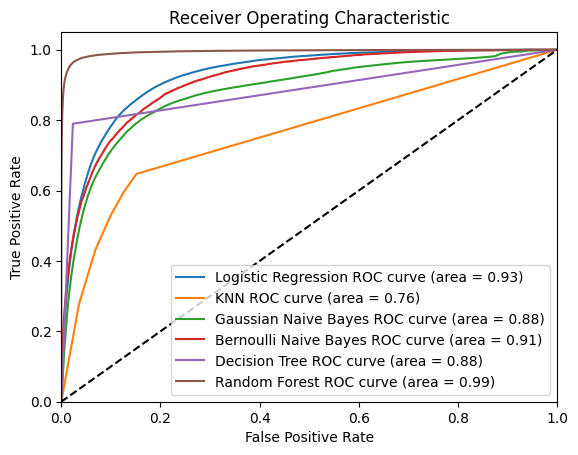

In [50]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    #'Multi': MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    # "SVM": SVC(probability=True, random_state=42),
    # "Neural Network": MLPClassifier(random_state=42),
    # "LightGBM": LGBMClassifier(random_state=42)
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_tomek, y_train_tomek)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_tomek)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_tomek)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test_tomek, y_test_pred)}")
    accuracy = accuracy_score(y_test_tomek, y_test_pred)
    mse = mean_squared_error(y_test_tomek, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test_tomek, y_test_prob)
        logloss = log_loss(y_test_tomek, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test_tomek, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### ADASYN

In [47]:
from imblearn.over_sampling import SMOTE, ADASYN
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
X_test_ada, y_test_ada=ada.fit_resample(X_test,y_test)

Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85    202133
           1       0.86      0.83      0.84    200878

    accuracy                           0.85    403011
   macro avg       0.85      0.85      0.85    403011
weighted avg       0.85      0.85      0.85    403011

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75    202133
           1       0.84      0.51      0.63    200878

    accuracy                           0.71    403011
   macro avg       0.74      0.70      0.69    403011
weighted avg       0.74      0.71      0.69    403011

Algorithm: Gaussian Naive Bayes
Gaussian Naive Bayes Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.56      0.68    202133
           1       0.67      0.91      0.77    2

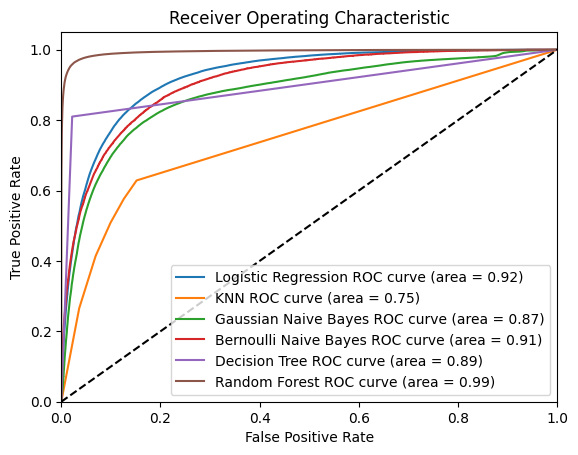

In [48]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    #'Multi': MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    # "SVM": SVC(probability=True, random_state=42),
    # "Neural Network": MLPClassifier(random_state=42),
    # "LightGBM": LGBMClassifier(random_state=42)
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_ada, y_train_ada)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_ada)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_ada)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test_ada, y_test_pred)}")
    accuracy = accuracy_score(y_test_ada, y_test_pred)
    mse = mean_squared_error(y_test_ada, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test_ada, y_test_prob)
        logloss = log_loss(y_test_ada, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test_ada, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### SMOTEENN

In [43]:
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
X_test_smoteenn, y_test_smoteenn=smoteenn.fit_resample(X_test,y_test)

Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87    172845
           1       0.90      0.86      0.88    201854

    accuracy                           0.87    374699
   macro avg       0.87      0.87      0.87    374699
weighted avg       0.87      0.87      0.87    374699

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77    172845
           1       0.88      0.61      0.72    201854

    accuracy                           0.75    374699
   macro avg       0.78      0.76      0.75    374699
weighted avg       0.78      0.75      0.74    374699

Algorithm: Gaussian Naive Bayes
Gaussian Naive Bayes Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.60      0.70    172845
           1       0.73      0.91      0.81    2

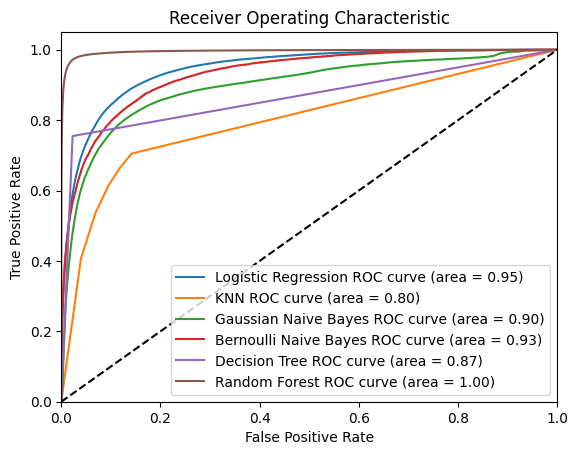

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    #'Multi': MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    # "SVM": SVC(probability=True, random_state=42),
    # "Neural Network": MLPClassifier(random_state=42),
    # "LightGBM": LGBMClassifier(random_state=42)
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_smoteenn, y_train_smoteenn)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_smoteenn)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_smoteenn)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test_smoteenn, y_test_pred)}")
    accuracy = accuracy_score(y_test_smoteenn, y_test_pred)
    mse = mean_squared_error(y_test_smoteenn, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test_smoteenn, y_test_prob)
        logloss = log_loss(y_test_smoteenn, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test_smoteenn, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()S
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### SMOTE

In [75]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote=smote.fit_resample(X_test,y_test)


Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85    202133
           1       0.86      0.84      0.85    202133

    accuracy                           0.85    404266
   macro avg       0.85      0.85      0.85    404266
weighted avg       0.85      0.85      0.85    404266

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.66      0.90      0.76    202133
           1       0.84      0.53      0.65    202133

    accuracy                           0.71    404266
   macro avg       0.75      0.71      0.70    404266
weighted avg       0.75      0.71      0.70    404266

Algorithm: Gaussian Naive Bayes
Gaussian Naive Bayes Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.87      0.57      0.68    202133
           1       0.68      0.91      0.78    2

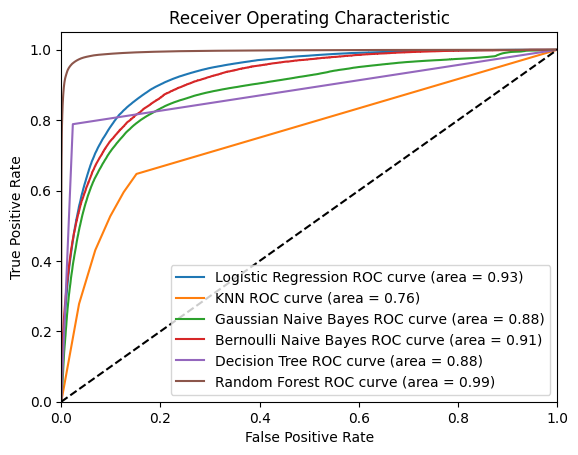

In [76]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    #'Multi': MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    # "SVM": SVC(probability=True, random_state=42),
    # "Neural Network": MLPClassifier(random_state=42),
    # "LightGBM": LGBMClassifier(random_state=42)
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_smote, y_train_smote)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_smote)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_smote)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test_smote, y_test_pred)}")
    accuracy = accuracy_score(y_test_smote, y_test_pred)
    mse = mean_squared_error(y_test_smote, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test_smote, y_test_prob)
        logloss = log_loss(y_test_smote, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test_smote, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Under sample

In [53]:
from imblearn.under_sampling import *

### TomekLink

In [54]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)
X_test_tl, y_test_tl=tl.fit_resample(X_test,y_test)

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    #'Multi': MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_tl, y_train_tl)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_tl)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_tl)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test_tl, y_test_pred)}")
    accuracy = accuracy_score(y_test_tl, y_test_pred)
    mse = mean_squared_error(y_test_tl, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test_tl, y_test_prob)
        logloss = log_loss(y_test_tl, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test_tl, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    201300
           1       0.68      0.00      0.01      2878

    accuracy                           0.99    204178
   macro avg       0.84      0.50      0.50    204178
weighted avg       0.98      0.99      0.98    204178

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    201300
           1       0.33      0.02      0.03      2878

    accuracy                           0.99    204178
   macro avg       0.66      0.51      0.51    204178
weighted avg       0.98      0.99      0.98    204178

Algorithm: Gaussian Naive Bayes
Gaussian Naive Bayes Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93    201300
           1       0.06      0.60      0.11     

### ENN

In [ ]:
enn = EditedNearestNeighbours()
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)
X_test_enn, y_test_enn=enn.fit_resample(X_test,y_test)

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    #'Multi': MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    # "SVM": SVC(probability=True, random_state=42),
    # "Neural Network": MLPClassifier(random_state=42),
    # "LightGBM": LGBMClassifier(random_state=42)
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_enn, y_train_enn)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_enn)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_enn)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test_enn, y_test_pred)}")
    accuracy = accuracy_score(y_test_enn, y_test_pred)
    mse = mean_squared_error(y_test_enn, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test_enn, y_test_prob)
        logloss = log_loss(y_test_enn, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test_enn, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### RandomUnderSample

In [69]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
X_test_under, y_test_under=undersample.fit_resample(X_test,y_test)

In [70]:
y_test_under.value_counts()

fraud_bool
0    2878
1    2878
Name: count, dtype: int64

In [72]:
X_test_under.shape

(5756, 45)

Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2878
           1       0.82      0.76      0.79      2878

    accuracy                           0.80      5756
   macro avg       0.80      0.80      0.80      5756
weighted avg       0.80      0.80      0.80      5756

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      2878
           1       0.71      0.74      0.72      2878

    accuracy                           0.72      5756
   macro avg       0.72      0.72      0.72      5756
weighted avg       0.72      0.72      0.72      5756

Algorithm: Gaussian Naive Bayes
Gaussian Naive Bayes Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      2878
           1       0.73      0.83      0.77     

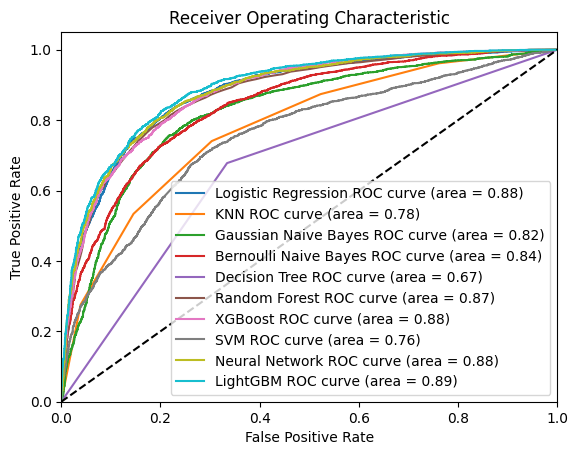

In [74]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    #'Multi': MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_under, y_train_under)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_under)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_under)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test_under, y_test_pred)}")
    accuracy = accuracy_score(y_test_under, y_test_pred)
    mse = mean_squared_error(y_test_under, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test_under, y_test_prob)
        logloss = log_loss(y_test_under, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test_under, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Ensemble method

In [51]:
from imblearn.ensemble import *

### Easy ensemble classification

In [ ]:
# eec = EasyEnsembleClassifier(random_state=42)
# eec.fit(X_train, y_train)

Algorithm: Easy Ensemble Classifier
Easy Ensemble Classifier Test Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    202133
           1       0.06      0.79      0.11      2878

    accuracy                           0.82    205011
   macro avg       0.53      0.80      0.50    205011
weighted avg       0.98      0.82      0.89    205011

Algorithm: Rust Classifier
Rust Classifier Test Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    202133
           1       0.06      0.79      0.11      2878

    accuracy                           0.82    205011
   macro avg       0.53      0.81      0.51    205011
weighted avg       0.98      0.82      0.89    205011

Algorithm: BalancedBaggingClassifier
BalancedBaggingClassifier Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    202133
    

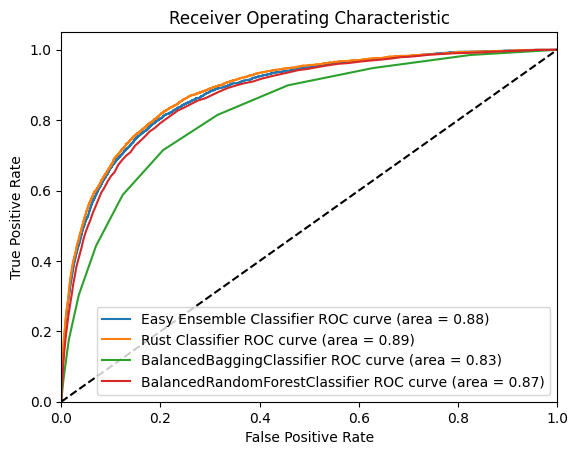

In [52]:
# Define models
models = {
    "Easy Ensemble Classifier": EasyEnsembleClassifier(random_state=42),
    'Rust Classifier': RUSBoostClassifier(random_state=42),
    'BalancedBaggingClassifier': BalancedBaggingClassifier(random_state=42),
    'BalancedRandomForestClassifier': BalancedRandomForestClassifier(random_state=42),
    
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test, y_test_pred)}")
    accuracy = accuracy_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test, y_test_prob)
        logloss = log_loss(y_test, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()